# (Matrix factorization)

##### Read the training and test csv datasets

In [1]:
from numpy import genfromtxt
import numpy as np
import pandas as pd
ratings = genfromtxt('ratings.csv', delimiter=',')
ratings_test = genfromtxt('ratings_test.csv', delimiter=',')
# X_Test = genfromtxt('X_test.csv', delimiter=',')
# Y_Test = genfromtxt('y_test.csv', delimiter=',')

In [2]:
movies = []
with open('movies.txt') as inputfile:
    for line in inputfile:
        movies.append(line.strip())

In [3]:
len(movies)

1682

In [4]:
ratings.shape

(95000, 3)

In [5]:
len(np.unique(ratings[:,1]))


1676

##### Setting Variables

In [6]:
N1=len(np.unique(ratings[:,0]))
N2=len(movies)
sigma=0.25
d=10
lamda=1
u=np.zeros([N1, d])
v = np.random.normal(0, 1/lamda, (d,N2))
# v=np.zeros([d, N2])

In [7]:
M=np.zeros([N1,N2])
M.shape

(943, 1682)

In [8]:
for i in range(len(ratings)):
    M[ratings[i][0].astype(int)-1][ratings[i][1].astype(int)-1]=ratings[i][2]

In [9]:
def calc_L(u,v):
    s11=0
    for i in range(len(M_new)):
#     print("Iteration :",i)
        s11=s11+(ratings[i][2]-(np.dot(u[int(M_new[i][0]-1),:].T,v[:,int(M_new[i][1]-1)])))**2
    s11=-0.5/(sigma) * s11 

    s1=0
    for i in range(N1):  
        s1=s1+np.sum(np.square(u[i,:]))
#     s1=s1+u[i,:]**2
    s1=-1*(lamda/2)*s1

    s2=0
    for j in range(N2):
        s2=s2+np.sum(np.square(v[:,j]))
#     s2=s2+v[:,j]**2
    s2=-1*(lamda/2)*s2 

    L=s11+s1+s2
    return L

In [10]:
def rmse1(u,v):
    pred_ratings=[]
    for i in range(ratings_test.shape[0]):
        pred_ratings.append(np.dot(u[ratings_test[i][0].astype(int)-1,:].reshape(1,10),v[:,ratings_test[i][1].astype(int)-1]))
    pred_ratings=np.asarray(pred_ratings).flatten()
#     len(pred_ratings)
    # x=np.subtract
    val=np.dot((ratings_test[:,2]-pred_ratings),(ratings_test[:,2]-pred_ratings))
    val2=np.sqrt(val)/len(pred_ratings)
    return val2


In [11]:
M_new=ratings.tolist()
M_new[0]

[196.0, 242.0, -0.53039]

In [12]:
from numpy.linalg import inv
maxL=-np.inf
L=np.zeros([10,100])
rmse=[]
for t2 in range(10):
    print("Outer Iteration : ",t2)
    u=np.random.normal(0,1, (N1,d))
    v = np.random.normal(0, 1, (d,N2))
    for t in range(100):
        print("Iteration : ",t)
        for i in range(N1):
            p1=lamda*sigma*np.identity(d)
            s1=np.zeros([d,d])
            s2=np.zeros(10)
            for j in range((N2)):
                if (M[i][j]!=0):
                    s1=s1+np.outer(v[:,j],v[:,j].T)
                    s2=s2+(M[i][j]*v[:,j])
            s3=(np.add(p1,s1))
            s3_inv=inv(s3)
            u[i]=np.dot(s3_inv,s2)
        
        for j in range(N2):
            p1=lamda*sigma*np.identity(d)
            s1=np.zeros([d,d])
            s2=np.zeros(d)
            for i in range((N1)):
                if (M[i][j]!=0):
                    s1=s1+np.outer(u[i,:],u[i,:].T)
                    s2=s2+(M[i][j]*u[i,:])  
            s3=(np.add(p1,s1))
            s3_inv=inv(s3)
            pp=np.dot(s3_inv,s2).reshape(1, 10)
            v[:,j]=pp
        L[t2][t]=calc_L(u,v)
    rmse.append(rmse1(u,v))
#     for i in range (len(L)):
    if maxL<L[t2][99]:
        
        maxL=L[t2][99]
        print(maxL)
        vfin=v

Outer Iteration :  0
Iteration :  0
Iteration :  1
Iteration :  2
Iteration :  3
Iteration :  4
Iteration :  5
Iteration :  6
Iteration :  7
Iteration :  8
Iteration :  9
Iteration :  10
Iteration :  11
Iteration :  12
Iteration :  13
Iteration :  14
Iteration :  15
Iteration :  16
Iteration :  17
Iteration :  18
Iteration :  19
Iteration :  20
Iteration :  21
Iteration :  22
Iteration :  23
Iteration :  24
Iteration :  25
Iteration :  26
Iteration :  27
Iteration :  28
Iteration :  29
Iteration :  30
Iteration :  31
Iteration :  32
Iteration :  33
Iteration :  34
Iteration :  35
Iteration :  36
Iteration :  37
Iteration :  38
Iteration :  39
Iteration :  40
Iteration :  41
Iteration :  42
Iteration :  43
Iteration :  44
Iteration :  45
Iteration :  46
Iteration :  47
Iteration :  48
Iteration :  49
Iteration :  50
Iteration :  51
Iteration :  52
Iteration :  53
Iteration :  54
Iteration :  55
Iteration :  56
Iteration :  57
Iteration :  58
Iteration :  59
Iteration :  60
Iteration :  

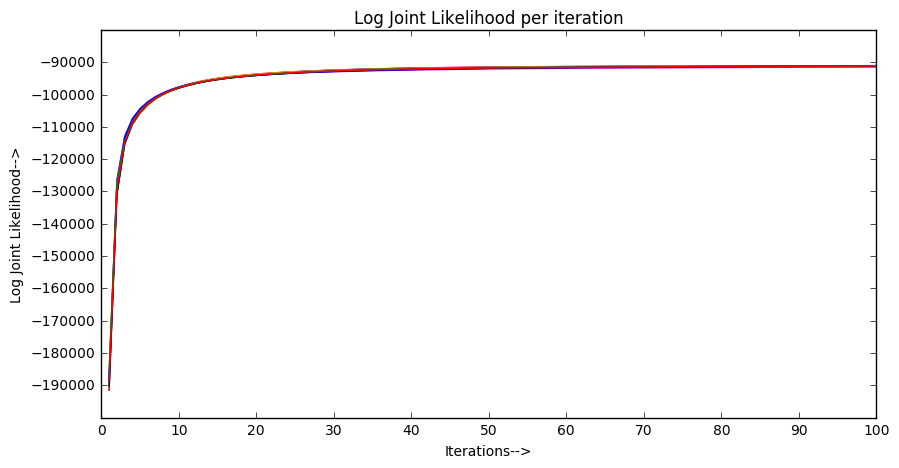

In [13]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(1, 101)
plt.figure(figsize=(10,5))
for i in range(10):
    plt.plot(x,L[i])
plt.yticks(np.arange(-190000, np.amax(L)+10000, 10000))
plt.xticks(np.arange(0, 100+1, 10))
# plt.plot(x,L[0])
plt.title("Log Joint Likelihood per iteration")
plt.ylabel('Log Joint Likelihood-->')
# x label
plt.xlabel('Iterations-->')
plt.show()

In [14]:
d = []
for i in range(0,len(L)):
    d.append({'Iteration': i+1,'RMSE': rmse[i]*np.sqrt(5000), 'L': L[i][99]})

d=pd.DataFrame(d)
d.sort(['L'], ascending=False)

/Users/kaavyachinniah/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Iteration,L,RMSE
1,2,-91036.399100,1.123120
2,3,-91045.420799,1.140822
0,1,-91047.833671,1.104284
5,6,-91048.564350,1.097130
8,9,-91087.418359,1.108041
3,4,-91129.943002,1.093458
7,8,-91148.554548,1.128638
6,7,-91149.232457,1.153016
9,10,-91173.881524,1.096480
4,5,-91464.403708,1.138446


In [15]:
movies2=np.array(movies)
for i in range (len(movies2)):
    movies2[i]=movies2[i].split(' (')[0]

In [16]:
i1 = np.where(movies2=='Star Wars')[0][0]
i2 = np.where(movies2=='My Fair Lady')[0][0]
i3 = np.where(movies2=='GoodFellas')[0][0]
# movies=movies.tolist()

In [17]:
def dist(x,y):   
    return np.sqrt(np.sum((x-y)**2))
#     return np.linalg.norm(x,y)

In [18]:
d1=[]
d2=[]
d3=[]
for j in range(N2):
    d1.append(dist(vfin[:,j],vfin[:,i1]))
    d2.append(dist(vfin[:,j],vfin[:,i2]))
    d3.append(dist(vfin[:,j],vfin[:,i3]))

d1=np.array(d1)
d2=np.array(d2)
d3=np.array(d3)

n=11
id1 = d1.argsort()[:n]
id2 = d2.argsort()[:n]
id3 = d3.argsort()[:n]

id1=id1
id2=id2
id3=id3

In [19]:
import pandas as pd
def top_10(ids,dis):
    
    d = []
    for i in range(1,len(ids)):
        d.append({'Closest Movies': movies[ids[i]], 'distance': dis[ids[i]]})

    d=pd.DataFrame(d)
    return d

In [20]:
print("Movie : ",movies[id1[0]])
top_10(id1,d1)

Movie :  Star Wars (1977)


,Closest Movies,distance
0,"Empire Strikes Back, The (1980)",0.323567
1,Raiders of the Lost Ark (1981),0.519164
2,Return of the Jedi (1983),0.597966
3,Manon of the Spring (Manon des sources) (1986),0.843176
4,"Princess Bride, The (1987)",0.907629
5,"Day the Earth Stood Still, The (1951)",0.922704
6,Indiana Jones and the Last Crusade (1989),0.929858
7,Love in the Afternoon (1957),0.932846
8,"Usual Suspects, The (1995)",0.961187
9,Waiting for Guffman (1996),1.013502


In [21]:
print("Movie : ",movies[id2[0]])
top_10(id2,d2)

Movie :  My Fair Lady (1964)


,Closest Movies,distance
0,Sabrina (1954),0.575952
1,Mary Poppins (1964),0.657808
2,Shadowlands (1993),0.714523
3,Victor/Victoria (1982),0.771604
4,Emma (1996),0.795570
5,Winnie the Pooh and the Blustery Day (1968),0.835970
6,That Thing You Do! (1996),0.837393
7,It Happened One Night (1934),0.843454
8,Guantanamera (1994),0.849123
9,"Sound of Music, The (1965)",0.870737


In [22]:
print("Movie : ",movies[id3[0]])
top_10(id3,d3)

Movie :  GoodFellas (1990)


,Closest Movies,distance
0,Casino (1995),0.563922
1,"Shining, The (1980)",0.680247
2,"Good, The Bad and The Ugly, The (1966)",0.683655
3,Bonnie and Clyde (1967),0.811198
4,Full Metal Jacket (1987),0.854024
5,Once Upon a Time in the West (1969),0.907832
6,"Godfather: Part II, The (1974)",0.928866
7,Desperado (1995),1.019445
8,Apocalypse Now (1979),1.057233
9,Cool Hand Luke (1967),1.070235
